# <center>Kuzushiji Dataset</center>

Machine learning researchers often concentrate on developing models that perform well on benchmark tasks to enhance their comprehension of the difficulties associated with those tasks. The task's content is typically insignificant to the researchers. As a result, benchmark tasks are now urged to emphasize more socially or culturally relevant topics. This research paper introduces the Kuzushiji-MNIST dataset, which is centered on Japanese cursive script. The authors also created two more extensive and challenging datasets, Kuzushiji-49 and Kuzushiji-Kanji, to encourage the machine learning community to become more involved in the world of Japanese classics. The goal is to increase awareness and interest in Japanese cursive writing and literature among machine learning experts.
_______________________________________________________________________________________________________________________________

<div><center>
<img src="https://blogs.nvidia.com/wp-content/uploads/2019/05/1.jpg" width="500"/>
</center></div>
<center>Image 1: AI Making Ancient Japanese Texts More Accessible</center>

# Introduction

The Kuzushiji dataset was developed by the Center for Open Data in the Humanities (CODH) at the National Institute of Letters of Japan (NIJL). In an effort to promote international cooperation, the Institute of New Technology and other research institutes initiated a national project in 2014 to transcribe about 300,000 old Japanese books, some of which were ancient. A bounding box is created for each text during transcription, but literary scholars do not consider it important. From a machine learning perspective, having a separate dataset for bounding boxes on the page is recommended as it can form the basis of various machine learning challenges and aid in automated transcription. In November 2016, the complete Kuzushiji dataset was released, consisting of 3,999 character types and 403,242 characters.

<div><center>
<img src="https://files.tofugu.com/articles/japanese/2012-01-25-hentaigana-history-of-japanese-writing-system/kuzushiji-strips.jpg" width="500"/>
</center></div>
<center>Image 2: Hentaigana: How japanese went from illegible to legible in 100 years</center>

In history, Japan had been relatively isolated from Western influences and culture. However, the country underwent a major reform of its education system in order to modernize its culture. As a result, the Japanese language, writing and printing systems underwent significant changes. Cursive script, which had been used in the past, is no longer taught in official school curricula due to the modernization of the language. This means that while Japanese has been used for over a millennium, the majority of Japanese people today are unable to read books that were written or published more than 150 years ago.

<div><center>
<img src="https://miro.medium.com/max/1372/1*9XaC-T_Tm7dedBcjVEcvGQ.png" width="200"/>
    </center></div>
<center>Image 3: The 10 classes of Kuzushiji-MNIST, with the first column showing each character's modern hiragana counterpart.</center>

### Data Quantity
Kuzushiji-MNIST is a dataset that consists of 70,000 grayscale images with a resolution of 28x28 pixels. This dataset is available in both the original MNIST format and a NumPy format. To comply with the 10-class restriction in MNIST, we selected one character to serve as the representative for each of the 10 rows of Hiragana in the creation of Kuzushiji-MNIST.

### Data Quality

The Kuzushiji-MNIST dataset has high data quality, with distinct and precisely defined characters that can be easily distinguished from one another. The dataset was meticulously curated and developed by the National Institute of Japanese Literature to ensure that it accurately represents the Kuzushiji script. Moreover, it is a suitable substitute for the widely used MNIST dataset, which has been a reliable benchmark dataset in the machine learning community for many years. As a result, the Kuzushiji-MNIST dataset is of excellent quality and can be utilized in various machine learning applications.

## Kuzushiji Dataset


In this coursework, the TensorFlow dataset called Kuzushiji-MNIST will be utilized as a replacement for the MNIST dataset. This dataset consists of 70,000 grayscale images of 28x28 pixels and is distinct from the MNIST, Reuters, IMDB, and Boston Housing Price datasets that were mentioned in the Coursework Instructions. 

The goal is to develop a model that can identify the Kuzushiji texts from the provided images and predict the modern Japanese script that the text belongs to. Due to the limitations of MNIST, only one character can be selected to represent each of the 10 rows of Hiragana when creating Kuzushiji-MNIST. It is important to note that different variations in handwriting can represent a character, as shown above. Additionally, this dataset is categorized as a multiclass, single label classification problem. Therefore, the last layer activation would be done using SoftMax and the loss function would be calculated using 'categorical-crossentropy'.

### Import Libraries

In [41]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from extra_keras_datasets import kmnist
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score,cohen_kappa_score
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Read the data

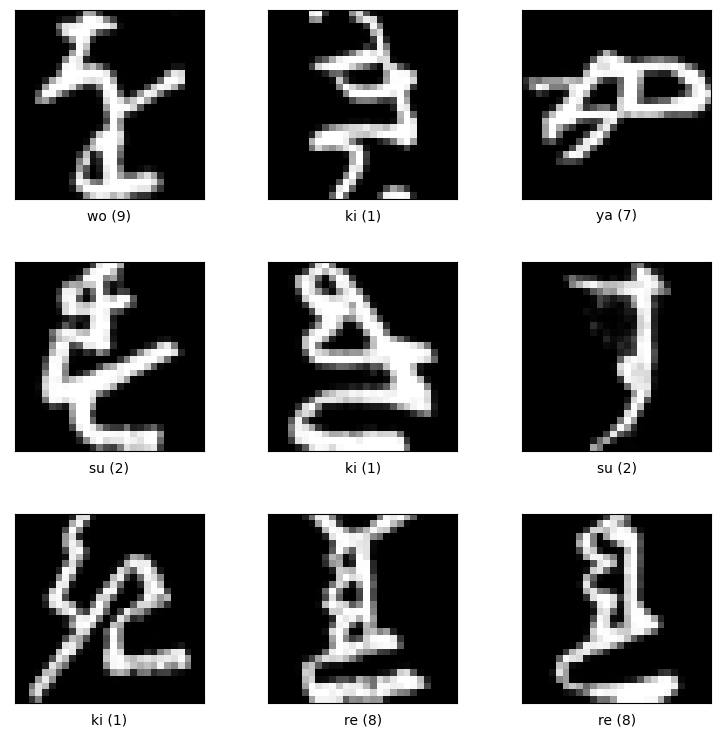

In [42]:
ds = 'kmnist'

data, data_info = tfds.load(ds, split='train', with_info=True)
fig = tfds.show_examples(data, data_info)

In [43]:
# Set total test size of the dataset
TEST_SIZE = 70000

# Set different the ratios for splitting the data
TRAIN_RATIO = 0.6
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.2

(X_train, y_train), (X_test, y_test) = kmnist.load_data(type='kmnist')

# X forms the training images, and y forms the training labels
X=np.concatenate([X_train,X_test])
y=np.concatenate([y_train,y_test])

# Shuffle the indices of the data
indices = np.random.permutation(len(X))

# Split the actual training data into sub-training of 80%, validation data of 20%, and test sets of 20%
train_indices = indices[:int(TRAIN_RATIO*len(X))]
val_indices = indices[int(TRAIN_RATIO*len(X)):int((TRAIN_RATIO+VALIDATION_RATIO)*len(X))]
test_indices = indices[int((TRAIN_RATIO+VALIDATION_RATIO)*len(X)):]

# Assign data to respective sets
X_train = X[train_indices]
y_train = y[train_indices]
X_val = X[val_indices]
y_val = y[val_indices]
X_test = X[test_indices]
y_test = y[test_indices]


print('X training image:', X_train.shape)
print('Y training labels:', y_train.shape)
print('X validation images:', X_val.shape)
print('Y validation labels:', y_val.shape)
print('X test image:', X_test.shape)
print('Y test labels:', y_test.shape)

X training image: (42000, 28, 28)
Y training labels: (42000,)
X validation images: (14000, 28, 28)
Y validation labels: (14000,)
X test image: (14000, 28, 28)
Y test labels: (14000,)


## Baseline

We will first start with creating our initial baseline by making an informed guess based on the available data. This computes the number of samples per label/class in both the training and test sets, and then uses this information to generate a baseline prediction model. It then computes the most frequent label by finding the index of the highest count in the training set. The result shows that the most frequent label is 5, and the accuracy of the model that predicts this label for every sample in the test set is 2.17%. This means that if the model predicts the label 5 for every sample in the test set, it will be correct only 2.17% of the time.

In [44]:
# Compute the number of samples per label/class in the training and test sets
train_sample = np.bincount(y_train)
test_sample = np.bincount(y_test)

# Print the number of samples per label/class in the training and test sets
print("Number of samples per label/class from 0 - 9 in training set:", train_sample)
print("Number of samples per label/class from 0 - 9 in test set:", test_sample)

# Compute the probability of correctly predicting the most frequent label in the training set
most_frequent_label = np.argmax(train_sample)
accuracy = (test_sample[most_frequent_label] / np.sum(y_test)) * 100

# Print the most frequent label and the accuracy using the probability model
print(f"Most frequent label: {most_frequent_label}")
print(f"Percentage of accuracy using probability model: {accuracy}")

Number of samples per label/class from 0 - 9 in training set: [4206 4172 4197 4125 4173 4269 4261 4184 4216 4197]
Number of samples per label/class from 0 - 9 in test set: [1400 1380 1334 1416 1412 1380 1407 1464 1368 1439]
Most frequent label: 5
Percentage of accuracy using probability model: 2.1756609752636806


# Pre-process the data

### Reshape Train and test images

This is to rescales the pixel values of the input images to be between 0 and 1 by dividing all pixel values by 255, which is the maximum pixel value. This normalization helps to improve the performance of the model during training.

After rescaling, the images are flattened by reshaping the 28x28 arrays into 1D vectors of length 784. This allows the images to be used as input to a fully connected neural network model that expects a 1D input vector.

In [5]:
#rescale from 0 to [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_val = X_val.astype('float32')/255

# reshape flattens 28x28 array to vector of 784 elements
X_train = X_train.reshape(42000, 28*28)
X_test = X_test.reshape(14000, 28*28)
X_val = X_val.reshape(14000, 28*28)

In [6]:
#encode with the convenient to categorical function
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_val=to_categorical(y_val)

In [7]:
print('X training image:', X_train.shape)
print('Y training labels:', y_train.shape)
print('X validation images:', X_val.shape)
print('Y validation labels:', y_val.shape)
print('X test image:', X_test.shape)
print('Y test labels:', y_test.shape)

X training image: (42000, 784)
Y training labels: (42000, 10)
X validation images: (14000, 784)
Y validation labels: (14000, 10)
X test image: (14000, 784)
Y test labels: (14000, 10)


## Optimizer

In this project, the Adam optimizer is being used as it is used for training deep learning models that combines the benefits of both adaptive learning rate methods and momentum-based optimization. It adapts the learning rate for each parameter and updates them separately, resulting in faster convergence and better accuracy. Additionally, Adam can handle noisy or sparse gradients, which is useful for datasets with a large number of images such as the KMNIST dataset used in this project.

## Evaluation of the Model using - Hold Out Protocol

### [ Underfit Model ]

The first model, we will be using underfit model as a baseline so that we can performance comparison of the more complex models using other model.

In [8]:
#empty network
underfit_model=models.Sequential()

In [9]:
underfit_model.add(layers.Dense(10,activation='softmax'))

In [10]:
#optimizer, loss and metrics are chosen at compilation
underfit_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# training - fit to input data
results1 = underfit_model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_val, y_val))

Epoch 1/10
329/329 [==============================] - 1s 2ms/step - loss: 1.0168 - accuracy: 0.7007 - val_loss: 0.7615 - val_accuracy: 0.7752
Epoch 2/10
329/329 [==============================] - 0s 1ms/step - loss: 0.7178 - accuracy: 0.7882 - val_loss: 0.7004 - val_accuracy: 0.7906
Epoch 3/10
329/329 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.7985 - val_loss: 0.6809 - val_accuracy: 0.7981
Epoch 4/10
329/329 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.8053 - val_loss: 0.6719 - val_accuracy: 0.8003
Epoch 5/10
329/329 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.8084 - val_loss: 0.6674 - val_accuracy: 0.8029
Epoch 6/10
329/329 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.8096 - val_loss: 0.6659 - val_accuracy: 0.8016
Epoch 7/10
329/329 [==============================] - 0s 1ms/step - loss: 0.6303 - accuracy: 0.8126 - val_loss: 0.6588 - val_accuracy: 0.8071
Epoch 

In [12]:
underfit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Plotting of Training & Validation Accuracy vs Loss
The code is a function that plots the training and validation accuracy and loss for a given set of results. The purpose of plotting these metrics is to evaluate the performance of the model during training. 

Accuracy is the fraction of correctly classified samples out of the total number of samples. In the context of machine learning, it is a common metric used to evaluate the performance of classification models. The accuracy metric tells us how often the model correctly predicts the class of a given sample. Loss, on the other hand, measures how well the model is able to minimize its error during training. Loss is a numerical value that tells us how far the model's prediction is from the actual target value. 

This is to monitor the model's performance during training and make adjustments as necessary. If we see that the validation accuracy is significantly lower than the training accuracy, it may be a sign of overfitting, and we may want to introduce regularization techniques to address this issue. If the validation loss is not decreasing, it may be a sign that the learning rate is too high and needs to be adjusted.

In [13]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(results1):
    hist = results1.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(loss)+1))
    epochs1 = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs1,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs1,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1.1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1.1])

    
    iplot(fig, filename='accuracy-loss')

In [14]:
plot_accuracy_and_loss(results1)

C:\Users\CJM\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [15]:
test_loss,test_acc=underfit_model.evaluate(X_val,y_val)

438/438 [==============================] - 0s 610us/step - loss: 0.6556 - accuracy: 0.8055


## [Overfit Model]

We will use overfit model now to find a model that balances the bias-variance tradeoff. If the first model (underfit) is not performing well, it could indicate that the model is too simple and needs to be made more complex to capture the patterns in the data. Therefore, we make the model bigger or increasing the training until the model achieve overfitting which degrades the performance on the validation data.

In [16]:
# Define input layer
inputs = layers.Input(shape=(28*28,))

# Define hidden layers
x = layers.Dense(512, activation='relu')(inputs)
x = layers.Dense(124, activation='relu')(x)
x = layers.Dense(46, activation='relu')(x)

# Define output layer
outputs = layers.Dense(10, activation='softmax')(x)

# Define model
overfit_network = models.Model(inputs=inputs, outputs=outputs)

In [17]:
overfit_network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
results2 = overfit_network.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/20
657/657 [==============================] - 5s 6ms/step - loss: 0.4412 - accuracy: 0.8635 - val_loss: 0.2559 - val_accuracy: 0.9234
Epoch 2/20
657/657 [==============================] - 4s 6ms/step - loss: 0.1789 - accuracy: 0.9448 - val_loss: 0.2282 - val_accuracy: 0.9322
Epoch 3/20
657/657 [==============================] - 4s 6ms/step - loss: 0.1078 - accuracy: 0.9667 - val_loss: 0.1845 - val_accuracy: 0.9502
Epoch 4/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0692 - accuracy: 0.9788 - val_loss: 0.1800 - val_accuracy: 0.9506
Epoch 5/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.2034 - val_accuracy: 0.9507
Epoch 6/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.2361 - val_accuracy: 0.9455
Epoch 7/20
657/657 [==============================] - 4s 6ms/step - loss: 0.0324 - accuracy: 0.9893 - val_loss: 0.2196 - val_accuracy: 0.9543
Epoch 

In [19]:
overfit_network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 124)               63612     
                                                                 
 dense_3 (Dense)             (None, 46)                5750      
                                                                 
 dense_4 (Dense)             (None, 10)                470       
                                                                 
Total params: 471,752
Trainable params: 471,752
Non-trainable params: 0
_________________________________________________________________


In [20]:
plot_accuracy_and_loss(results2)

C:\Users\CJM\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [21]:
test_loss,test_acc=overfit_network.evaluate(X_val,y_val)

438/438 [==============================] - 1s 1ms/step - loss: 0.2546 - accuracy: 0.9617


## Regularising the Model

However, if we increase the complexity too much, the model might start overfitting the training data, which means it becomes too specialized to the training set and fails to generalize to new data. In that case, we would need to apply regularization techniques such as dropout or L2 regularization to reduce overfitting.

## DropOut Method

In [22]:
first_model=models.Sequential()
#adding 2 layers
first_model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
first_model.add(layers.Dropout(0.7))
first_model.add(layers.Dense(124,activation='relu'))
first_model.add(layers.Dense(46,activation='relu'))
first_model.add(layers.Dropout(0.7))
first_model.add(layers.Dense(10,activation='softmax'))

In [23]:
first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
first_fit = first_model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/25
657/657 [==============================] - 5s 7ms/step - loss: 1.3690 - accuracy: 0.5358 - val_loss: 0.5469 - val_accuracy: 0.8426
Epoch 2/25
657/657 [==============================] - 4s 6ms/step - loss: 0.8493 - accuracy: 0.7410 - val_loss: 0.4155 - val_accuracy: 0.8845
Epoch 3/25
657/657 [==============================] - 4s 7ms/step - loss: 0.7196 - accuracy: 0.7909 - val_loss: 0.3527 - val_accuracy: 0.9010
Epoch 4/25
657/657 [==============================] - 4s 7ms/step - loss: 0.6400 - accuracy: 0.8124 - val_loss: 0.3032 - val_accuracy: 0.9176
Epoch 5/25
657/657 [==============================] - 4s 7ms/step - loss: 0.5952 - accuracy: 0.8278 - val_loss: 0.2988 - val_accuracy: 0.9162
Epoch 6/25
657/657 [==============================] - 4s 7ms/step - loss: 0.5578 - accuracy: 0.8352 - val_loss: 0.2725 - val_accuracy: 0.9278
Epoch 7/25
657/657 [==============================] - 4s 7ms/step - loss: 0.5226 - accuracy: 0.8486 - val_loss: 0.2532 - val_accuracy: 0.9305
Epoch 

In [26]:
first_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 124)               63612     
                                                                 
 dense_7 (Dense)             (None, 46)                5750      
                                                                 
 dropout_1 (Dropout)         (None, 46)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                470       
                                                                 
Total params: 471,752
Trainable params: 471,752
Non-tr

In [27]:
plot_accuracy_and_loss(first_fit)

In [28]:
test_loss,test_acc=first_model.evaluate(X_val,y_val)

438/438 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9469


## Add in L1/L2 Regularizer

This is required to prevent overfitting in deep learning models by adding a penalty term to the loss function. L1 regularizer adds the sum of the absolute weights to the loss function while L2 regularizer adds the sum of squares of the weights. This encourages the model to have smaller weights and avoids it from over-relying on a few strong features, leading to a more generalizable model.

By adding these regularizers, the model is able to generalize better to unseen data, leading to improved performance on the validation set.

In [29]:
best_model = models.Sequential()

best_model.add(layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
best_model.add(layers.Dense(124, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
best_model.add(layers.Dense(46, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
best_model.add(layers.Dense(10, activation='softmax'))

In [30]:
best_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
best_fit = best_model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/25
657/657 [==============================] - 6s 8ms/step - loss: 3.0809 - accuracy: 0.7597 - val_loss: 1.4601 - val_accuracy: 0.8206
Epoch 2/25
657/657 [==============================] - 5s 8ms/step - loss: 1.3307 - accuracy: 0.8254 - val_loss: 1.2116 - val_accuracy: 0.8384
Epoch 3/25
657/657 [==============================] - 5s 8ms/step - loss: 1.1504 - accuracy: 0.8455 - val_loss: 1.1039 - val_accuracy: 0.8483
Epoch 4/25
657/657 [==============================] - 5s 8ms/step - loss: 1.0614 - accuracy: 0.8509 - val_loss: 1.0274 - val_accuracy: 0.8550
Epoch 5/25
657/657 [==============================] - 5s 8ms/step - loss: 0.9996 - accuracy: 0.8579 - val_loss: 1.0027 - val_accuracy: 0.8569
Epoch 6/25
657/657 [==============================] - 5s 8ms/step - loss: 0.9615 - accuracy: 0.8605 - val_loss: 0.9530 - val_accuracy: 0.8607
Epoch 7/25
657/657 [==============================] - 5s 8ms/step - loss: 0.9299 - accuracy: 0.8645 - val_loss: 0.9322 - val_accuracy: 0.8612
Epoch 

In [32]:
best_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 124)               63612     
                                                                 
 dense_11 (Dense)            (None, 46)                5750      
                                                                 
 dense_12 (Dense)            (None, 10)                470       
                                                                 
Total params: 471,752
Trainable params: 471,752
Non-trainable params: 0
_________________________________________________________________


In [33]:
plot_accuracy_and_loss(best_fit)

## Prediction

We will be evaluating our final model using a variety of metrics to demonstrate its effectiveness. This section evaluates the performance of a trained neural network (stored in the best_model variable) on a validation set (X_val, y_val). The printed metrics show that the neural network achieved a precision of 0.88, recall of 0.88, and F1-score of 0.88 on the validation set. These metrics indicate a good overall performance of the model on the validation set. The Cohen's kappa coefficient of 0.86 also indicates a substantial agreement between the predicted and true labels.

In [34]:
# Get the predicted probabilities for the validation set
y_pred_prob = best_model.predict(X_val)

# Get the predicted classes for the validation set
Y_pred = np.argmax(y_pred_prob, axis=1)

# Get the true classes for the validation set
y_true = np.argmax(y_val, axis=1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true,Y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, Y_pred, average='weighted')
recall = recall_score(y_true, Y_pred, average='weighted')
f1 = f1_score(y_true, Y_pred, average='weighted')

# Calculate Cohen's kappa coefficient
kappa = cohen_kappa_score(y_true, Y_pred)

# Print the metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Cohen kappa:', kappa)

438/438 [==============================] - 1s 1ms/step
Precision: 0.8816272616496393
Recall: 0.8784285714285714
F1-score: 0.8786393217220849
Cohen kappa: 0.8649096668721595


### Heatmap Visualisation of the confusion matrix
Here we will generate a heatmap visualization of the confusion matrix obtained from the model's predictions on the validation set. The confusion matrix displays the number of correct and incorrect model predictions, sorted by true class and expected class. True positive predictions (accurate predictions) are represented by diagonal cells, while false positive and false negative predictions are represented by off-diagonal cells (incorrect predictions).

By utilizing color coding to highlight the amount of guesses in each cell, the heatmap presentation makes the confusion matrix easier to read. The color map 'Blues' is used to symbolize the amount of predictions, with darker colors indicating a greater number of predictions.

Text(95.72222222222221, 0.5, 'Actual')

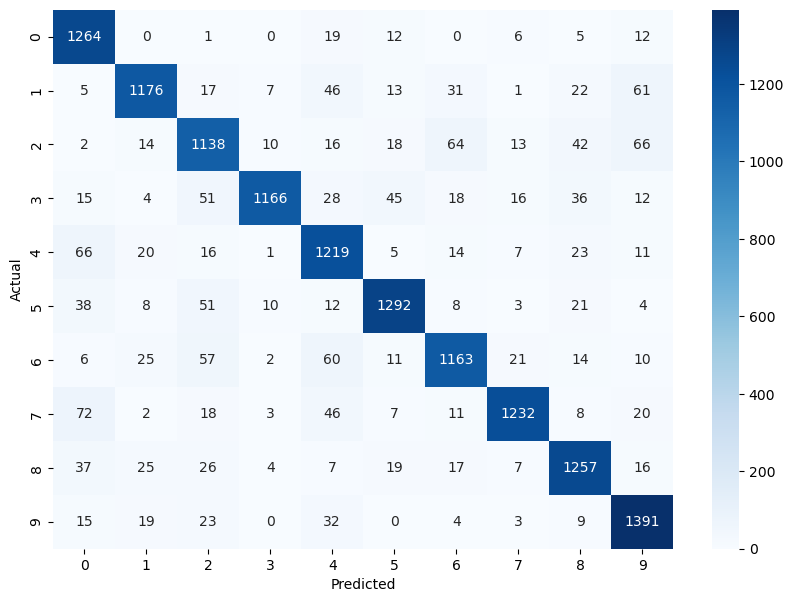

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Analysis

This analysis provides insights into the kinds of mistakes the model is making and can help guide improvements in the model's architecture or training process. From the above metrics that we generated, this model is able to perform well and achieved an accuracy of 87.91% on the validation set. The confusion matrix and classification report reveal that the model performed well across all classes, but had the most difficulty distinguishing between the classes "4" and "9".

The purpose of analysing the model's errors is to obtain insight into why the model may be underperforming with various classes. The visualization displays misclassified photos and offers information about the true and predicted labels. This information may be used to identify patterns in the model's errors and potentially influence future model architecture or training process improvements.

C:\Users\CJM\AppData\Local\Temp\ipykernel_4444\386593943.py:21: UserWarning:

Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from current font.

C:\Users\CJM\AppData\Local\Temp\ipykernel_4444\386593943.py:21: UserWarning:

Glyph 12385 (\N{HIRAGANA LETTER TI}) missing from current font.

C:\Users\CJM\AppData\Local\Temp\ipykernel_4444\386593943.py:21: UserWarning:

Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from current font.

C:\Users\CJM\AppData\Local\Temp\ipykernel_4444\386593943.py:21: UserWarning:

Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.

C:\Users\CJM\AppData\Local\Temp\ipykernel_4444\386593943.py:21: UserWarning:

Glyph 12429 (\N{HIRAGANA LETTER RO}) missing from current font.

C:\Users\CJM\AppData\Local\Temp\ipykernel_4444\386593943.py:21: UserWarning:

Glyph 12367 (\N{HIRAGANA LETTER KU}) missing from current font.

C:\Users\CJM\AppData\Local\Temp\ipykernel_4444\386593943.py:21: UserWarning:

Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.



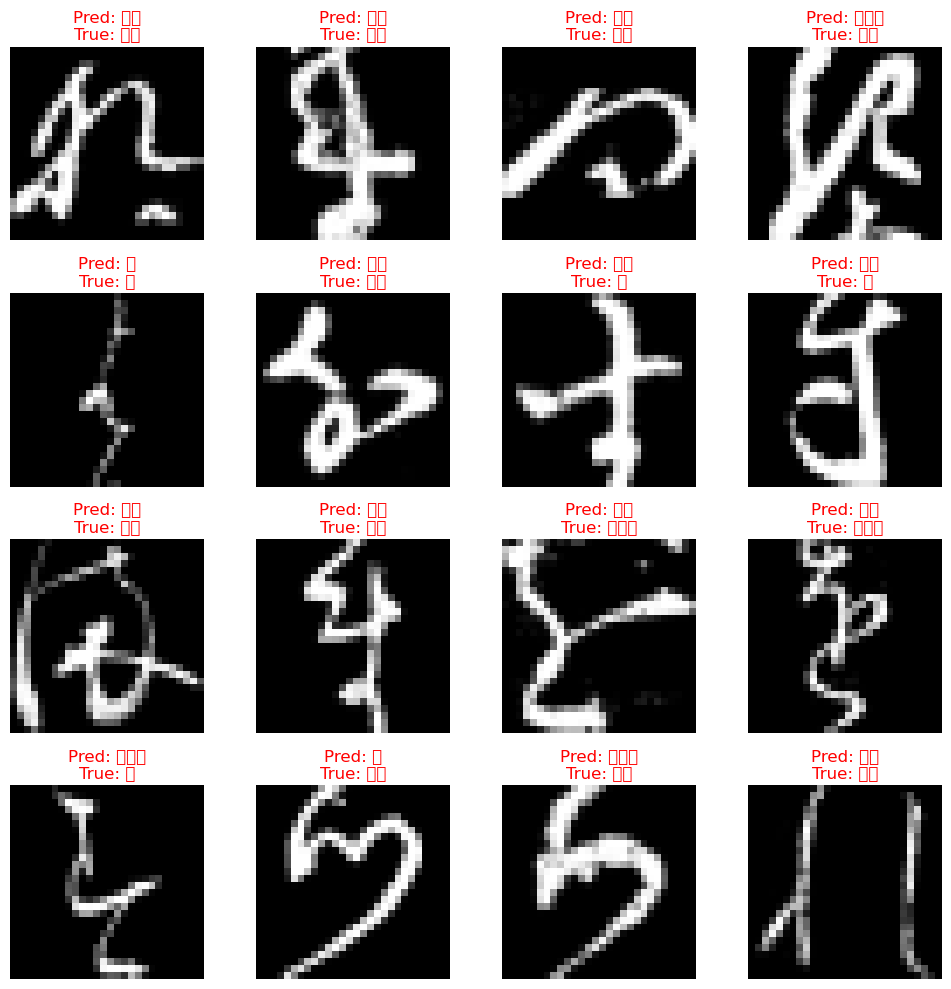

In [39]:
# Calculate the errors
class_names = ['れい', 'いち', 'に', 'さん', 'よん', 'ご', 'ろく', 'しち', 'はち', 'きゅう']
errors = (Y_pred != y_true)

# Find the indices of the errors
error_indices = np.where(errors)[0]

# Display the first 16 errors
n_errors = min(len(error_indices), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(n_errors):
    # Extract the image, predicted label, and true label for this error
    img = X_val[error_indices[i]].reshape(28, 28)
    pred_label = class_names[Y_pred[error_indices[i]]]
    true_label = class_names[y_true[error_indices[i]]]
    # Display the image with the predicted and true labels
    ax = axes[i//4, i%4]
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Pred: {pred_label}\nTrue: {true_label}', color='red')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Conclusion

In conclusion, we have successfully trained a deep learning model to classify the Kuzushiji-MNIST (KMNIST) dataset. We used a hold-out validation method to evaluate the model's performance and applied regularization techniques such as dropout and L1/L2 regularization to prevent overfitting. The Adam optimizer and categorical cross-entropy loss function were used during training, and the model achieved an accuracy of 87.91% on the validation set. 

We also calculated metrics such as precision, recall, F1-score, and Cohen's kappa coefficient to assess the model's performance. The confusion matrix and error analysis were used to visualize the model's performance and identify the most common errors.

Despite the variations in evaluation protocols, the models showed similar performance in generating decent results overall. It is important to note that the splitting of data during hold-out validation may affect the results, and there may be a more suitable model for iterated k-fold validation. Nonetheless, the models demonstrated the potential for accurately classifying the KMNIST dataset.

Overall, this project demonstrates the effectiveness of deep learning models in classifying handwritten characters and highlights the importance of model evaluation and selection of appropriate evaluation metrics.

## References

Hashi. (2012, January 25).HENTAIGANA: HOW JAPANESE WENT FROM ILLEGIBLE TO LEGIBLE IN 100 YEARS
https://www.tofugu.com/japanese/hentaigana-history-of-japanese-writing-system/

Bakalar, N. (2019, May 20). AI Making Ancient Japanese Texts More Accessible. NVIDIA Blog. Retrieved from https://blogs.nvidia.com/blog/2019/05/20/japanese-texts-ai/

The 10 classes of Kuzushiji-MNIST, with the first column showing each character's modern hiragana counterpart. Available at: https://siddharthganjoo.medium.com/cursive-hiragana-mnist-using-nn-177b0e221d93. 

ROIS-DS Center for Open Data in the Humanities (CODH). KMNIST Dataset. Adapted from Kuzushiji Dataset created by National Institute of Japanese Literature and others. Licensed under a Creative Commons Attribution Share-Alike 4.0 International License.http://codh.rois.ac.jp/kmnist/

Brownlee, J. (2019, March 18). How to Develop a Convolutional Neural Network From Scratch for MNIST Handwritten Digit Classification. Machine Learning Mastery. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/.

Anokas. (n.d.). Kuzushiji-MNIST. Kaggle. Retrieved March 9, 2023, from https://www.kaggle.com/anokas/kuzushiji.